In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [2]:
df = pd.read_csv('/content/creditcard.csv')


In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77333,57003,-1.565835,0.537575,3.284121,3.229021,-0.917761,2.016339,-1.157749,1.086392,0.234172,...,0.125678,1.072830,-0.229837,0.094444,0.215087,0.544487,0.271867,-0.089124,25.69,0.0
77334,57005,-0.710264,-0.095320,2.899716,0.718612,-0.501955,0.968641,-0.007123,0.308006,1.383339,...,0.069589,0.711129,-0.038570,0.088990,-0.282553,-0.448201,0.054450,-0.051693,65.00,0.0
77335,57005,0.875729,-0.658494,-0.798643,-0.889801,-0.205406,-1.093946,0.743501,-0.381269,0.405087,...,0.192299,0.161282,-0.451218,0.060376,0.885705,-0.477421,-0.036297,0.035704,235.53,0.0
77336,57006,-0.679923,1.074176,1.045563,1.100620,-0.764069,-1.048969,0.601586,0.283135,-0.674820,...,0.256539,0.475028,0.124473,0.886947,-0.327076,-0.362904,0.017048,0.109040,73.52,0.0


In [4]:
print(df.shape)



(77338, 31)


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77338 entries, 0 to 77337
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    77338 non-null  int64  
 1   V1      77338 non-null  float64
 2   V2      77338 non-null  float64
 3   V3      77338 non-null  float64
 4   V4      77338 non-null  float64
 5   V5      77338 non-null  float64
 6   V6      77338 non-null  float64
 7   V7      77338 non-null  float64
 8   V8      77338 non-null  float64
 9   V9      77338 non-null  float64
 10  V10     77338 non-null  float64
 11  V11     77338 non-null  float64
 12  V12     77338 non-null  float64
 13  V13     77338 non-null  float64
 14  V14     77337 non-null  float64
 15  V15     77337 non-null  float64
 16  V16     77337 non-null  float64
 17  V17     77337 non-null  float64
 18  V18     77337 non-null  float64
 19  V19     77337 non-null  float64
 20  V20     77337 non-null  float64
 21  V21     77337 non-null  float64
 22

In [6]:
print(df.describe())


               Time            V1            V2            V3            V4  \
count  77338.000000  77338.000000  77338.000000  77338.000000  77338.000000   
mean   36633.048243     -0.254918     -0.031977      0.678014      0.164544   
std    14986.790777      1.883504      1.670498      1.395670      1.369866   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    30195.250000     -1.016589     -0.597243      0.187865     -0.726170   
50%    39488.000000     -0.248318      0.070092      0.765732      0.183869   
75%    48186.000000      1.153837      0.723977      1.396222      1.046651   
max    57006.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  77338.000000  77338.000000  77338.000000  77338.000000  77338.000000   
mean      -0.275915      0.096378     -0.114258      0.054293     -0.002388   
std        1.384600      1.304456      1.250692    

In [7]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
duplicate=df.duplicated()
duplicate.sum()

303

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
duplicate=df.duplicated()
duplicate.sum()

0

In [13]:
!pip install sweetviz
!pip install pandas
!pip install dataprofiler
!pip install ydata_profiling


In [14]:
from ydata_profiling import ProfileReport
import pandas as pd

profile = ProfileReport(df, title="Data Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 31/31 [00:06<00:00,  4.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Class
0.0    76846
1.0      188
Name: count, dtype: int64


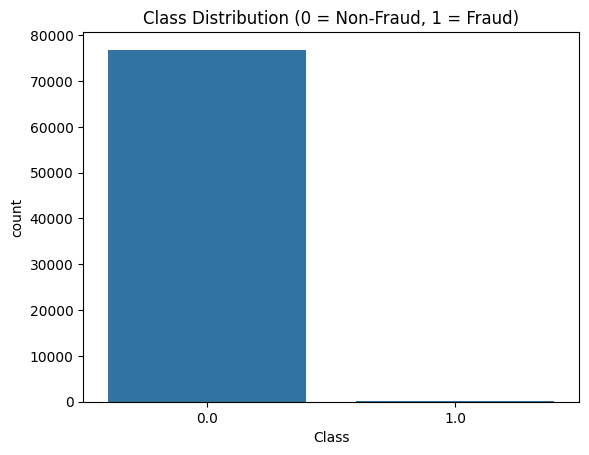

In [15]:
print(df['Class'].value_counts())


sns.countplot(data=df, x='Class')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()


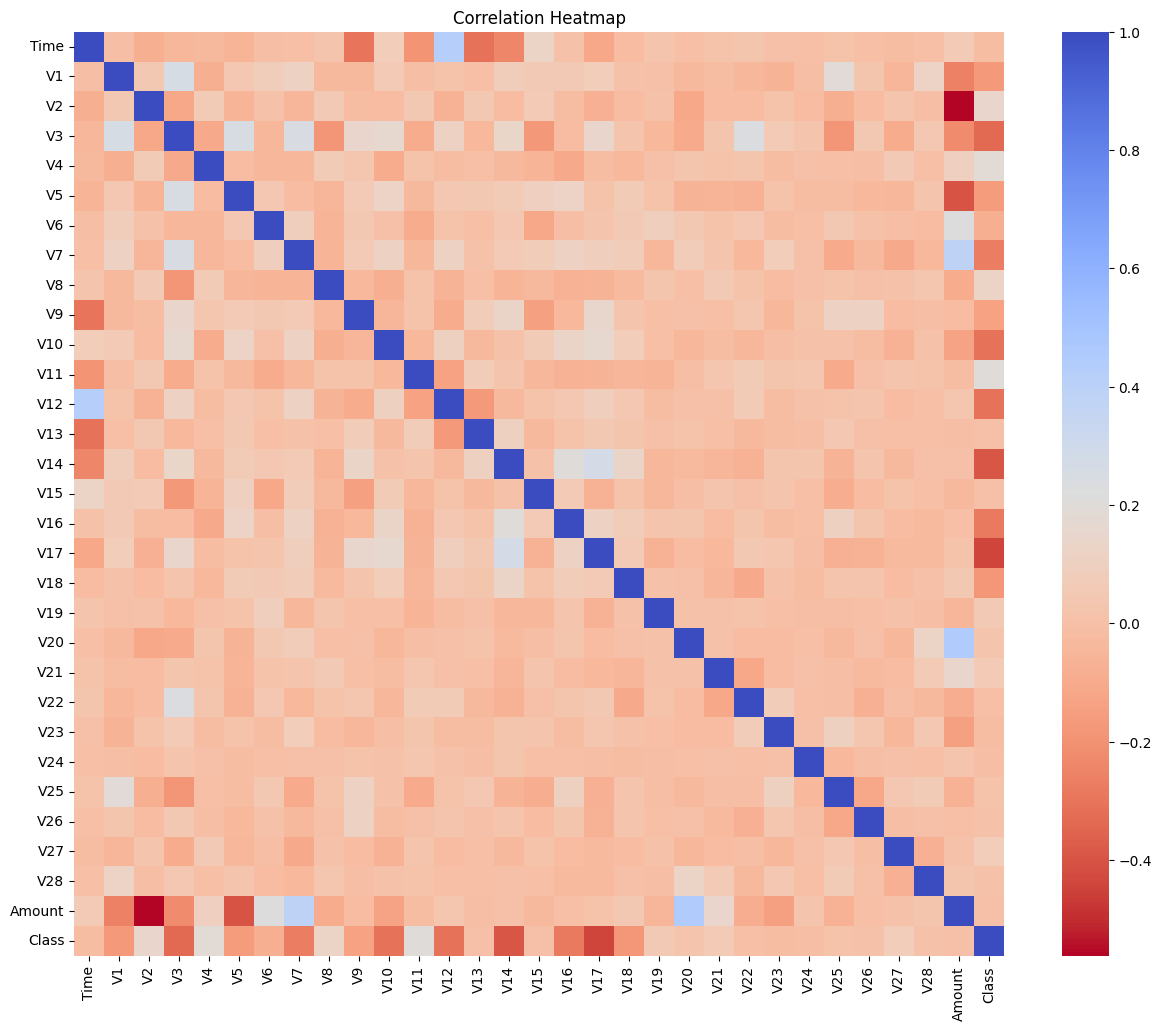

In [16]:
corr = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [17]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


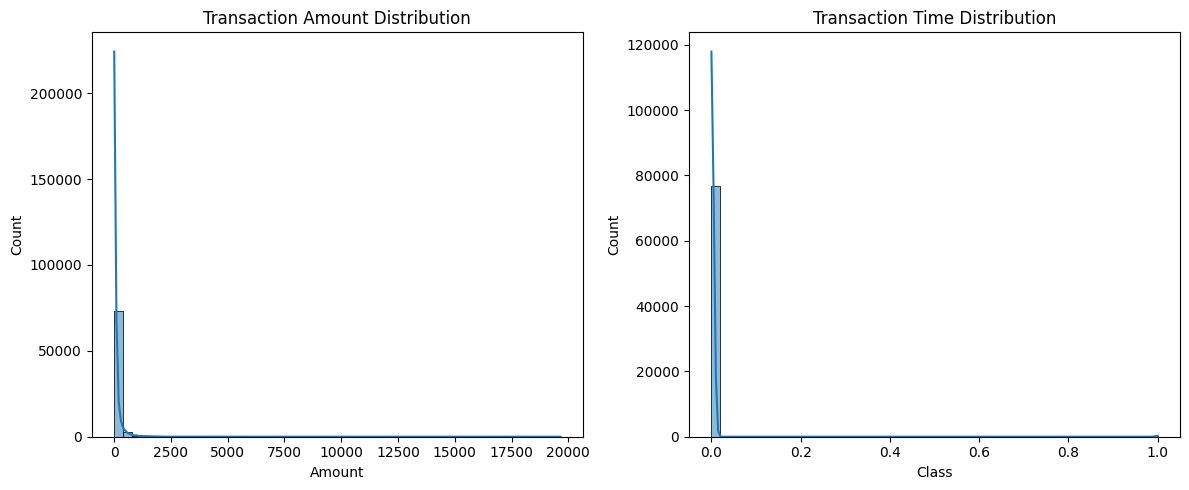

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Class'], bins=50, kde=True)
plt.title('Transaction Time Distribution')

plt.tight_layout()
plt.show()


In [19]:
import plotly.figure_factory as ff
from plotly.offline import iplot

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [20]:
Numerical_Features = df.select_dtypes(include=['int64', 'float64']).columns
Numerical_Features = Numerical_Features.drop('Class')

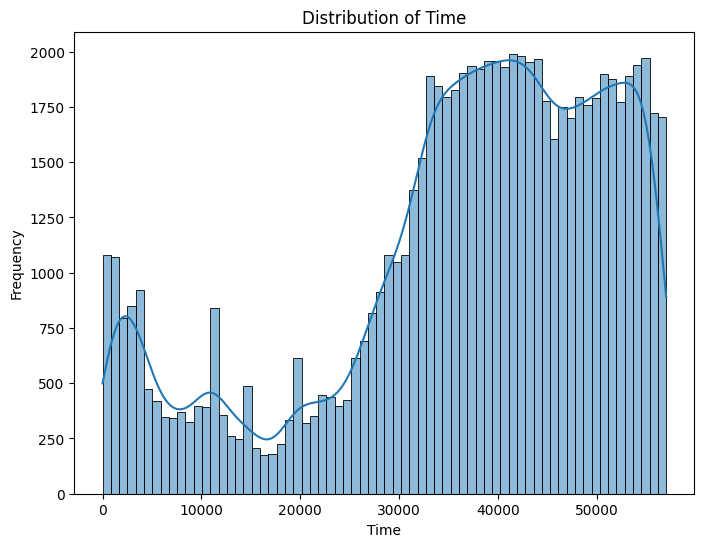

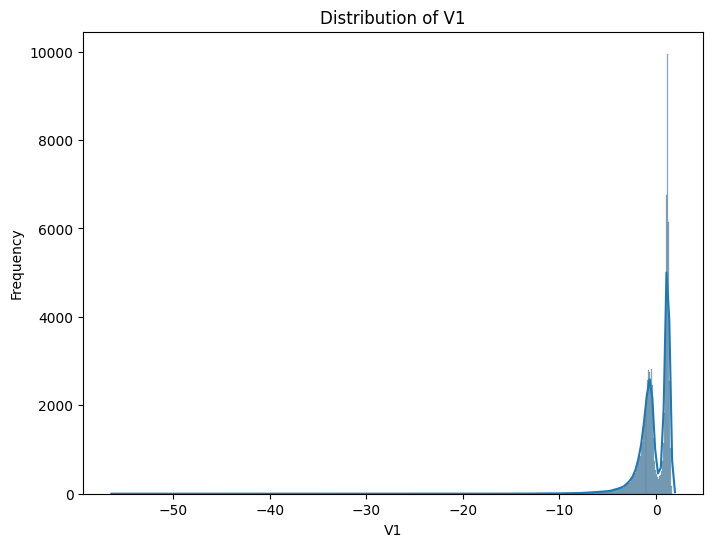

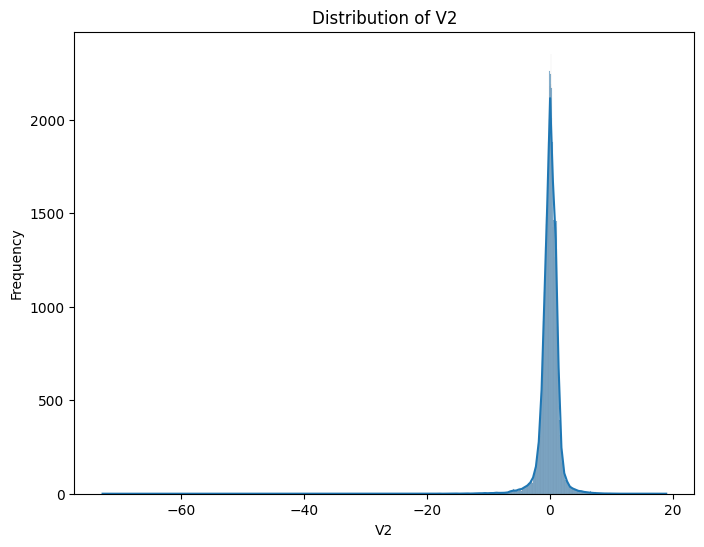

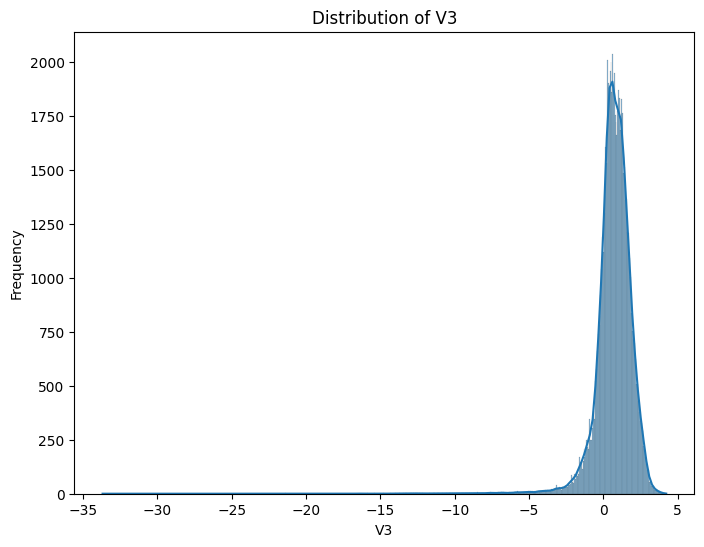

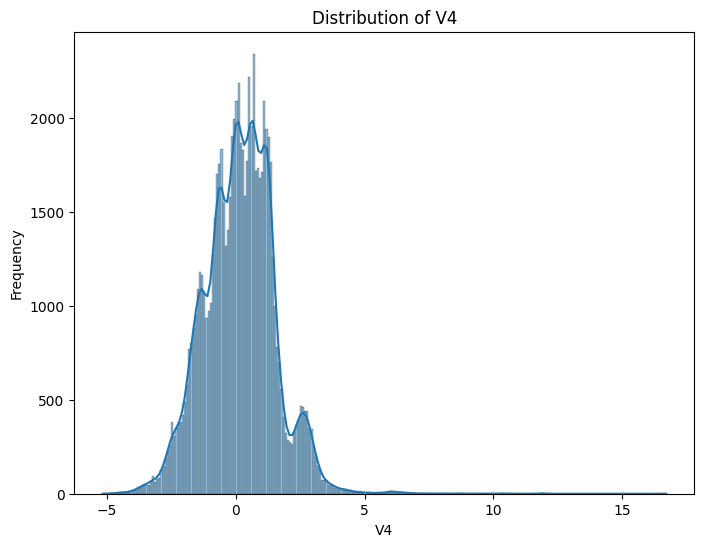

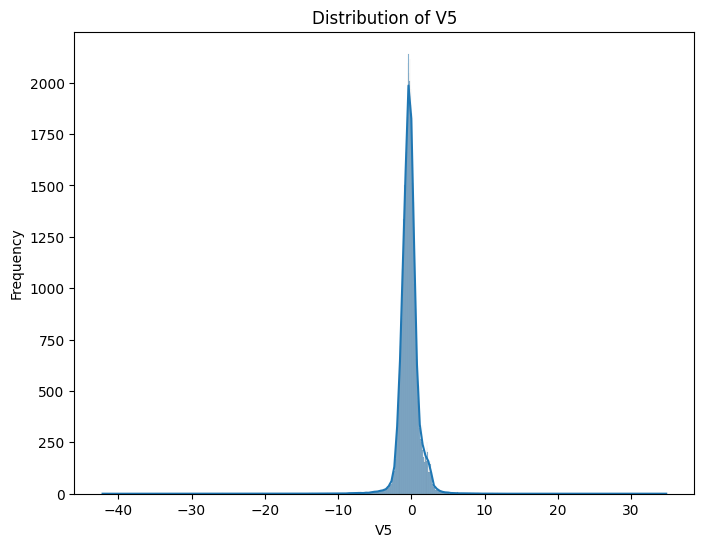

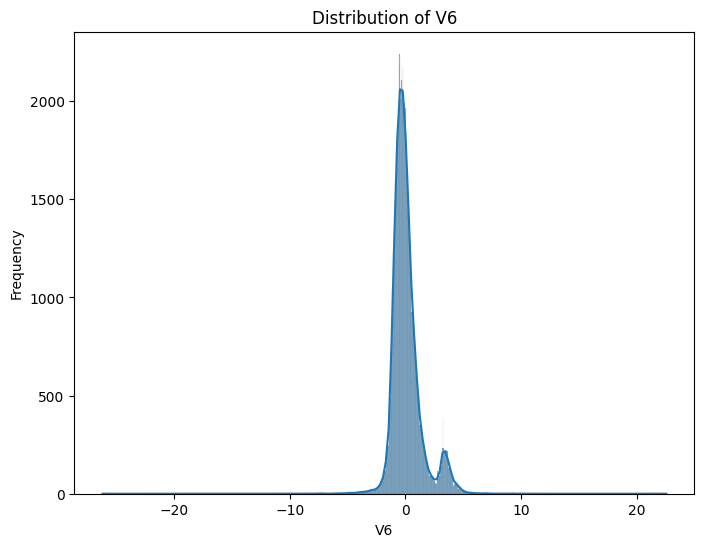

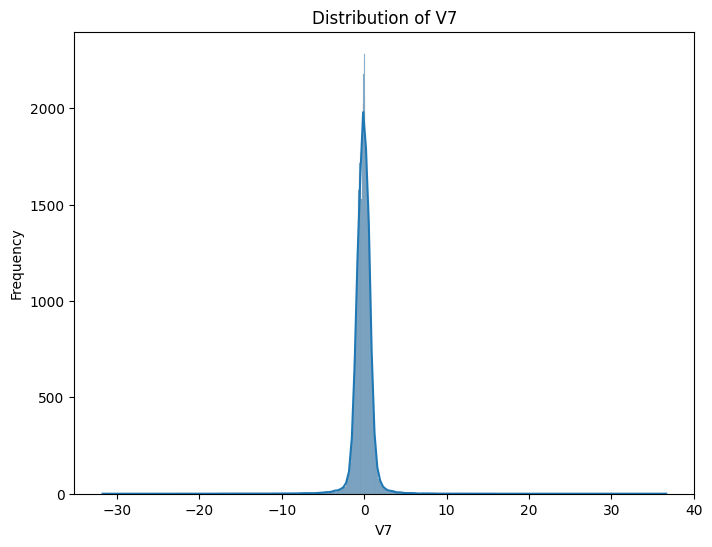

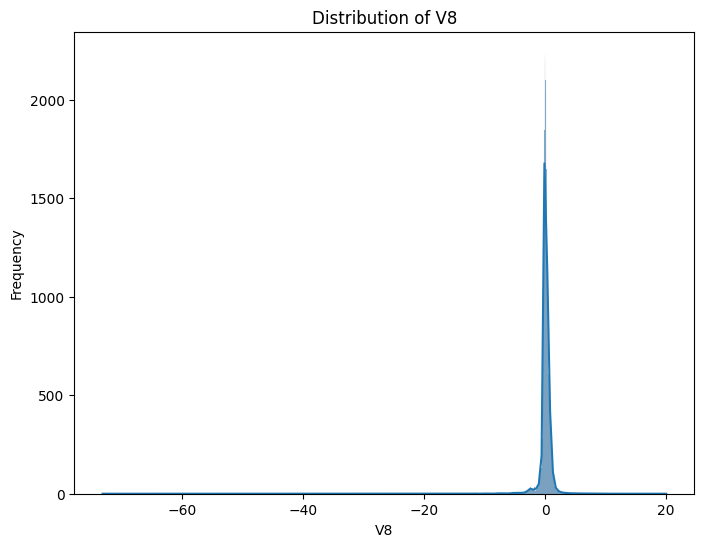

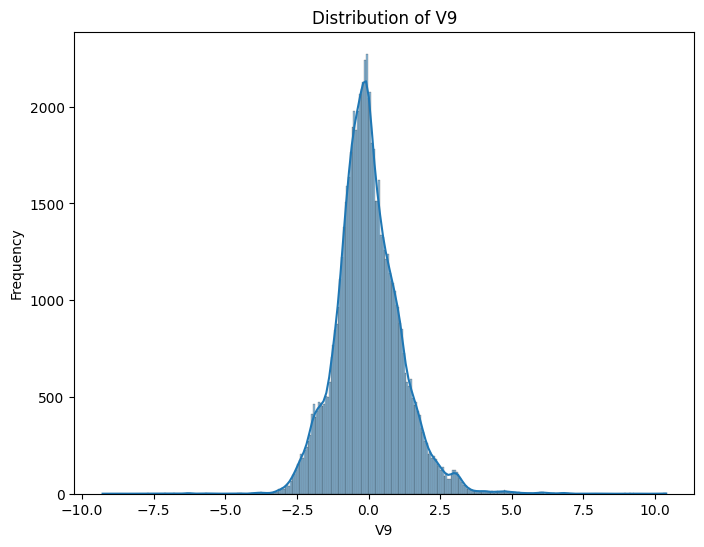

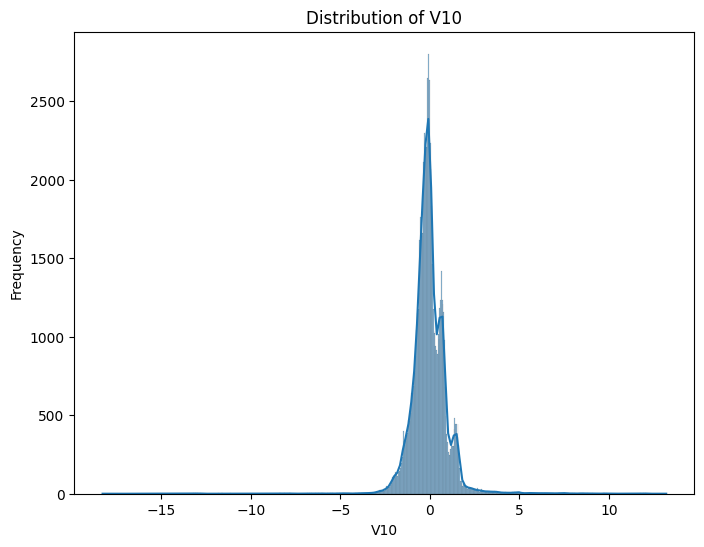

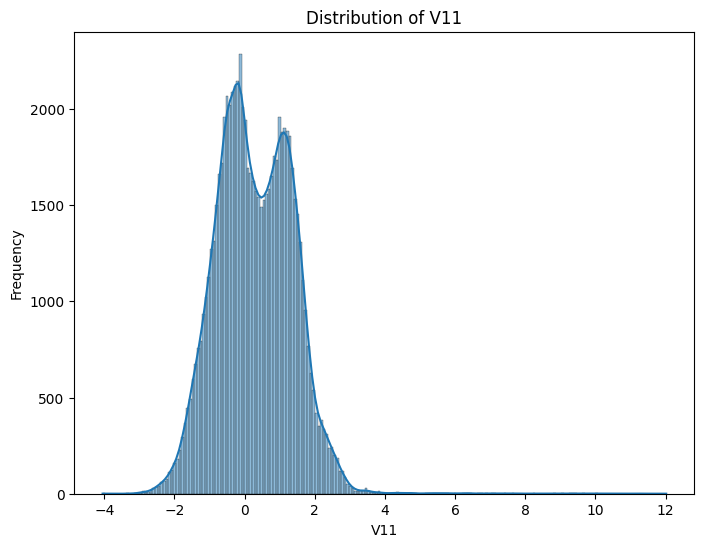

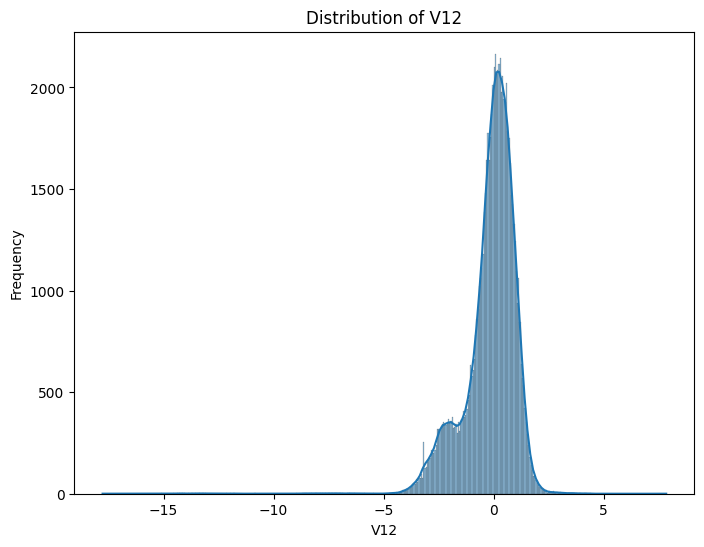

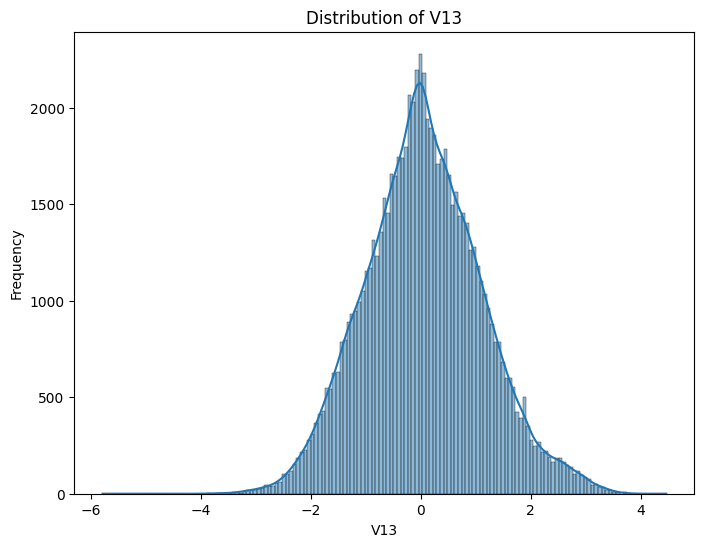

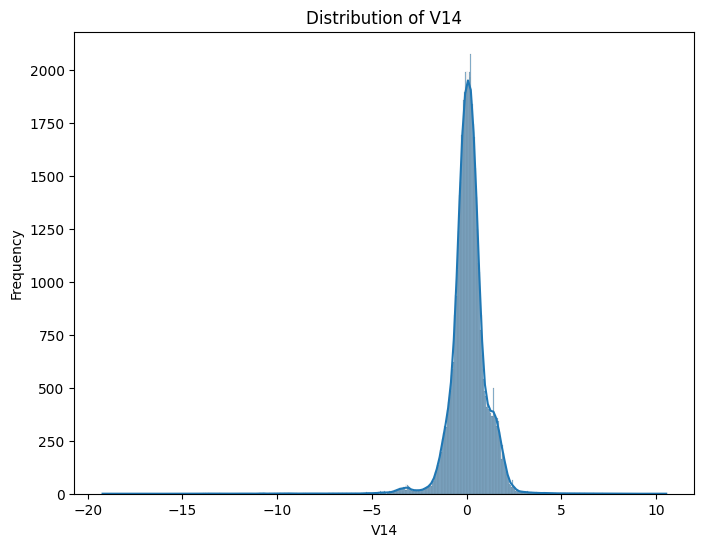

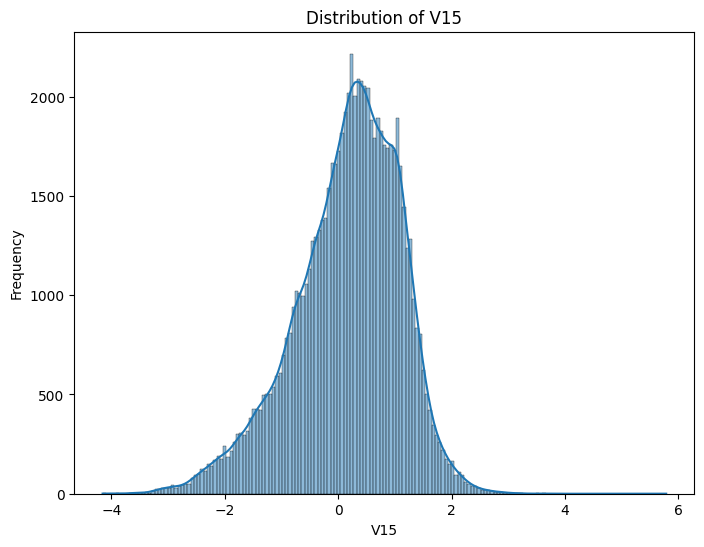

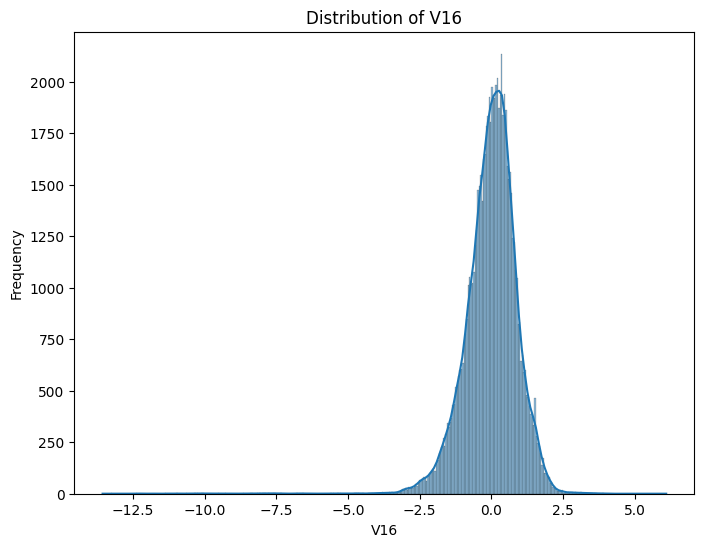

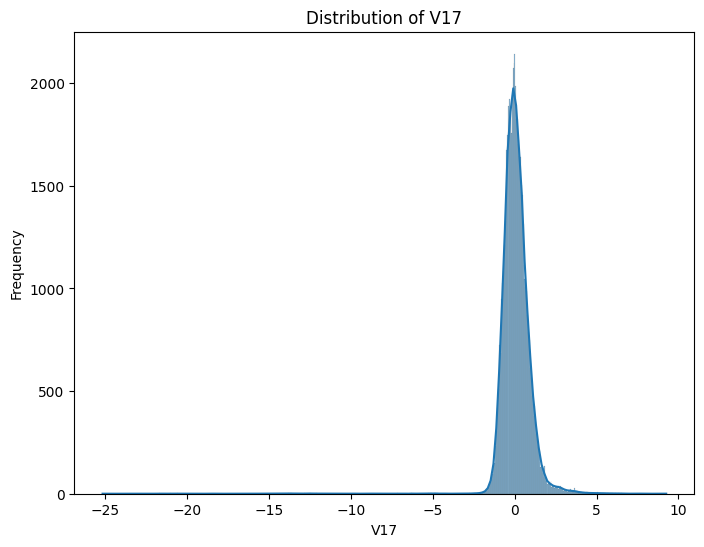

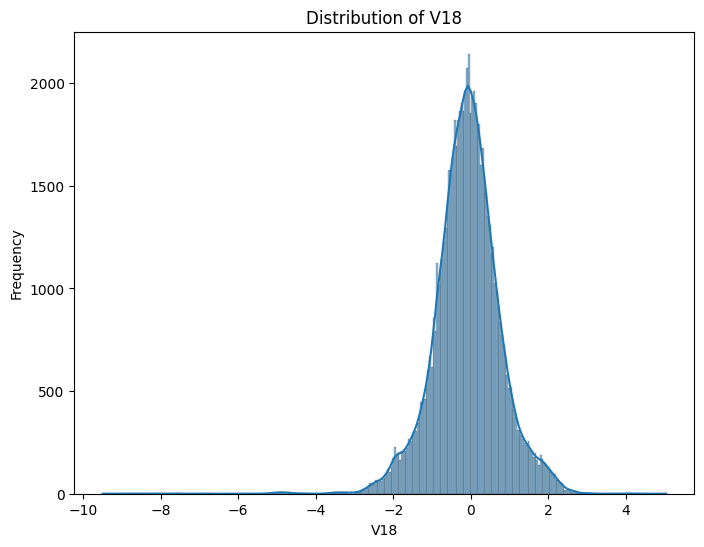

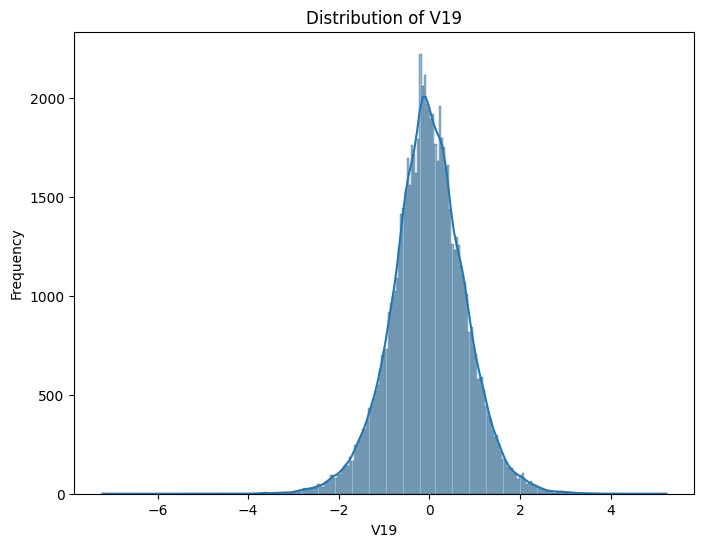

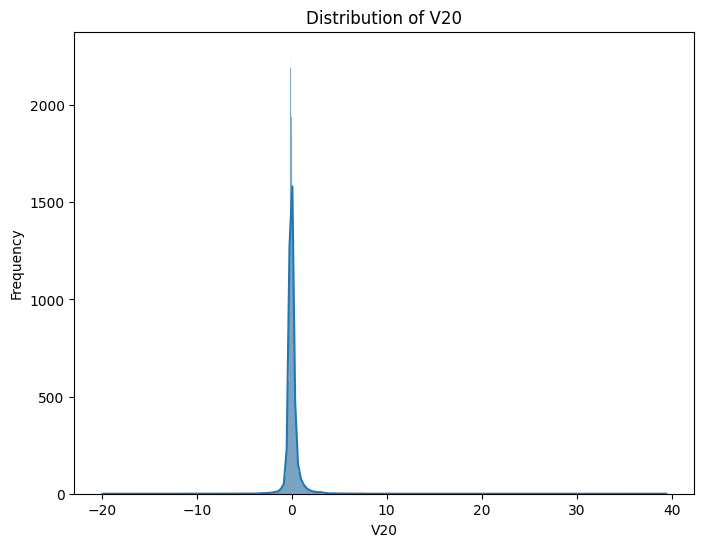

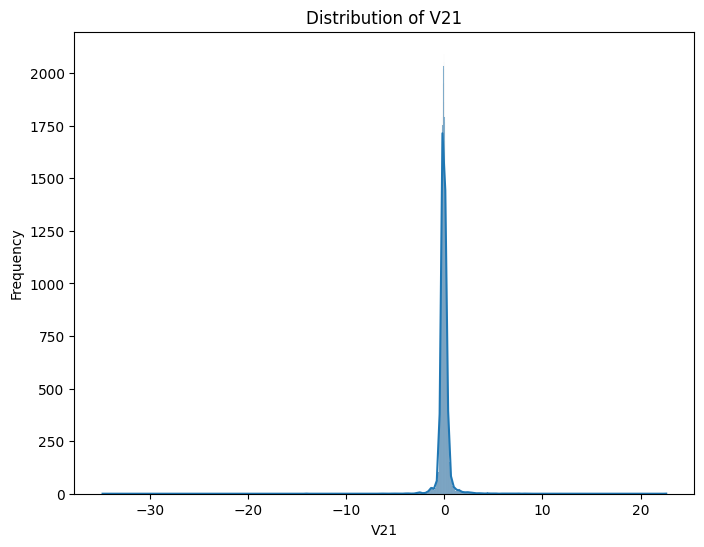

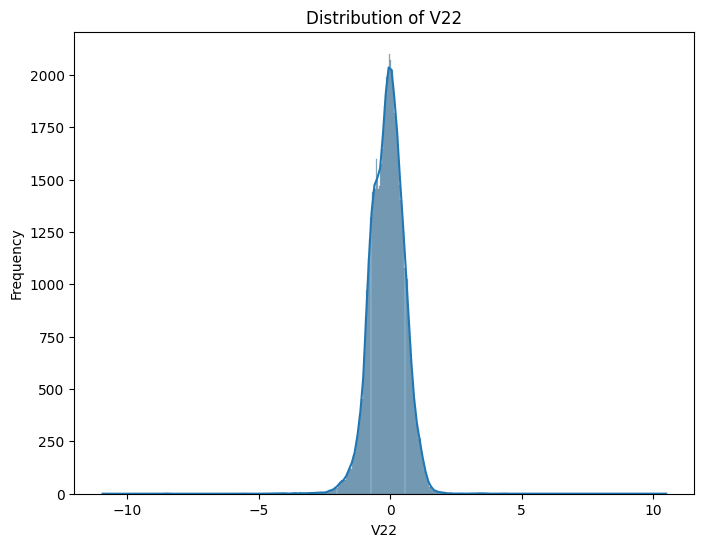

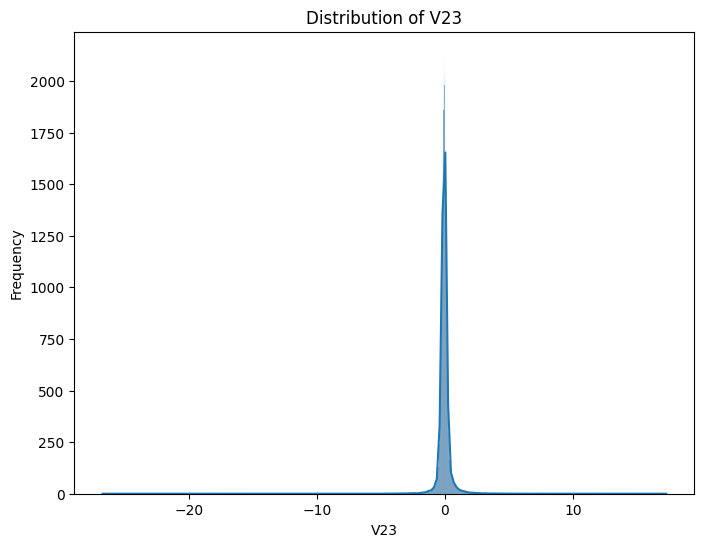

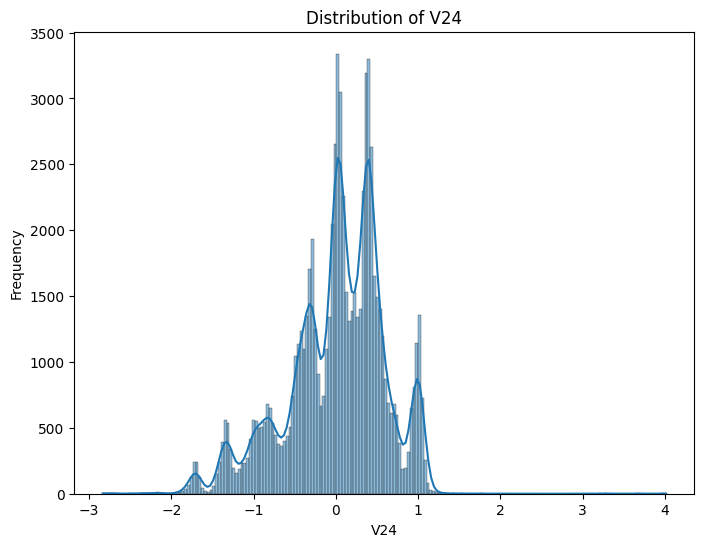

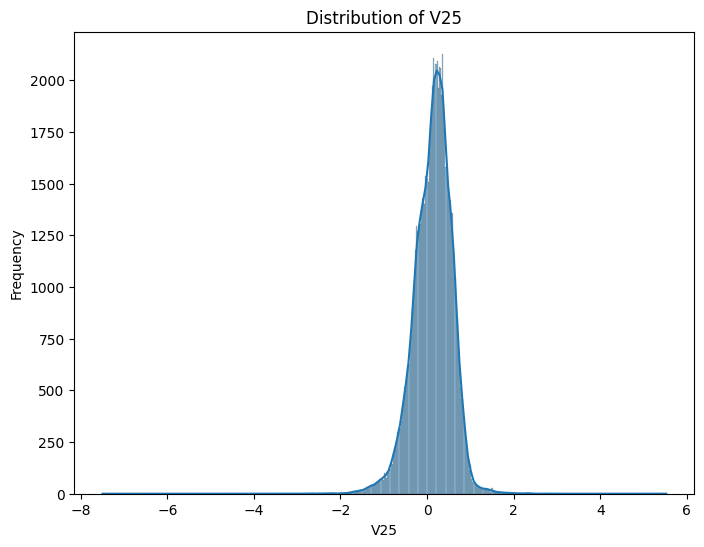

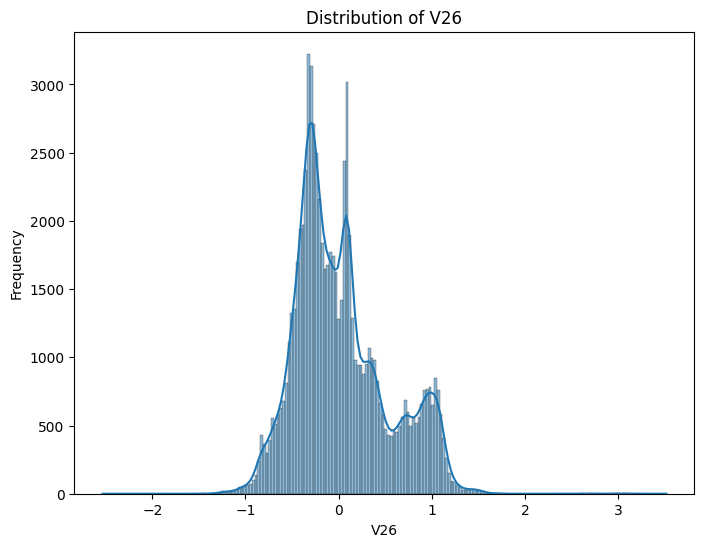

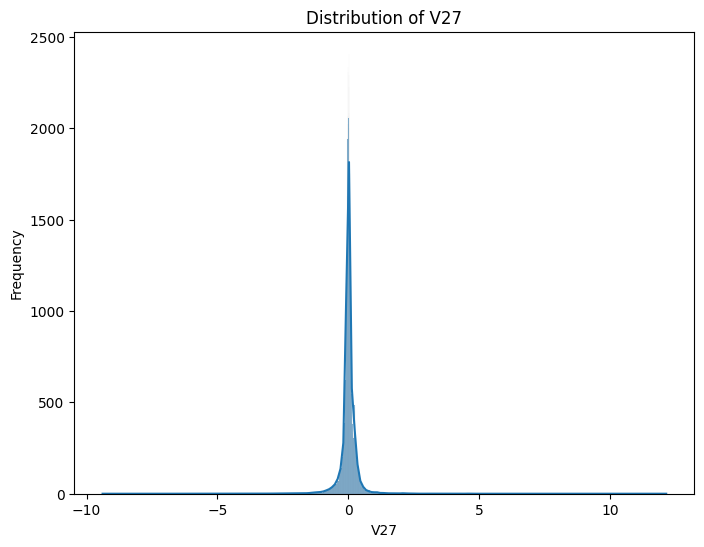

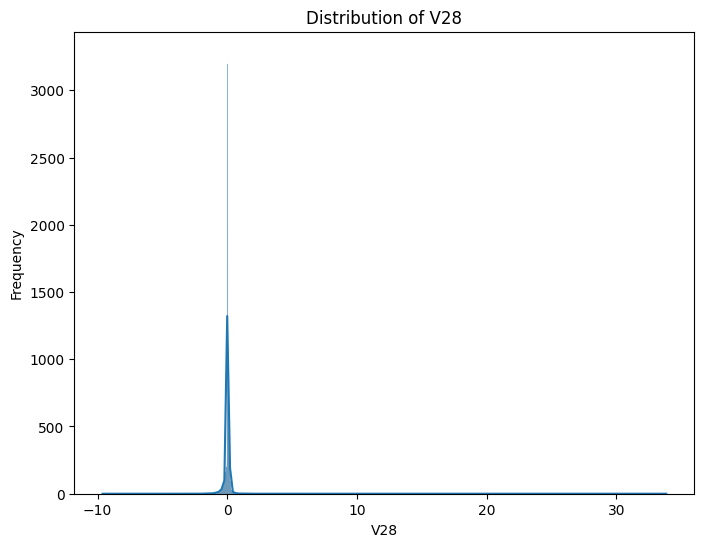

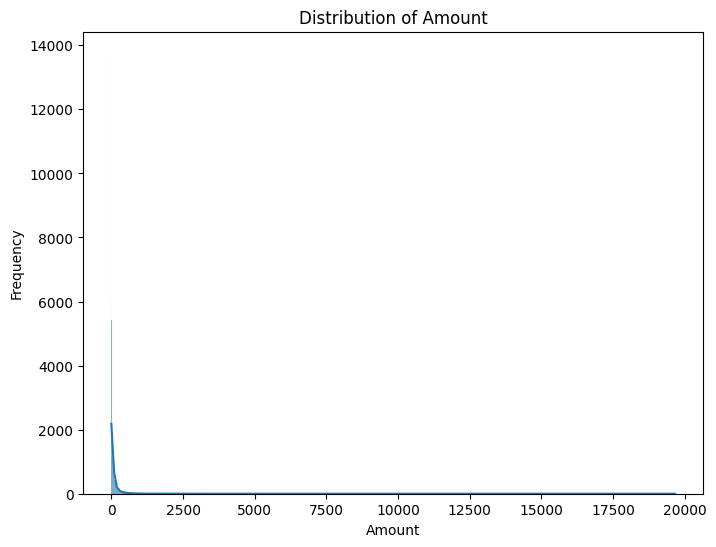

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Numerical_Features' contains your selected numerical features
for feature in Numerical_Features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

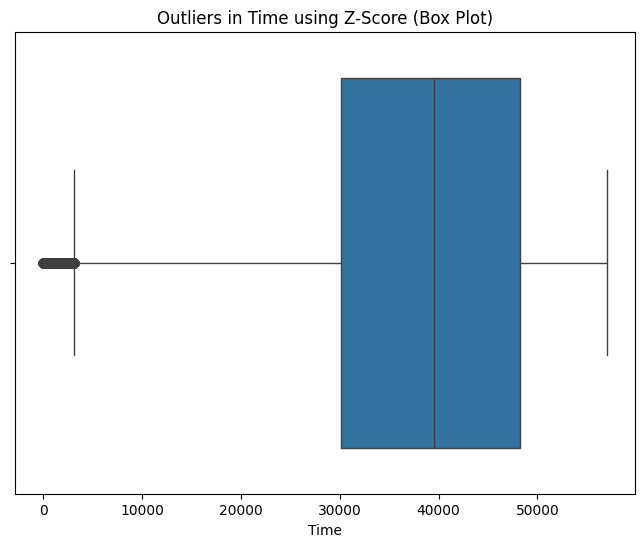

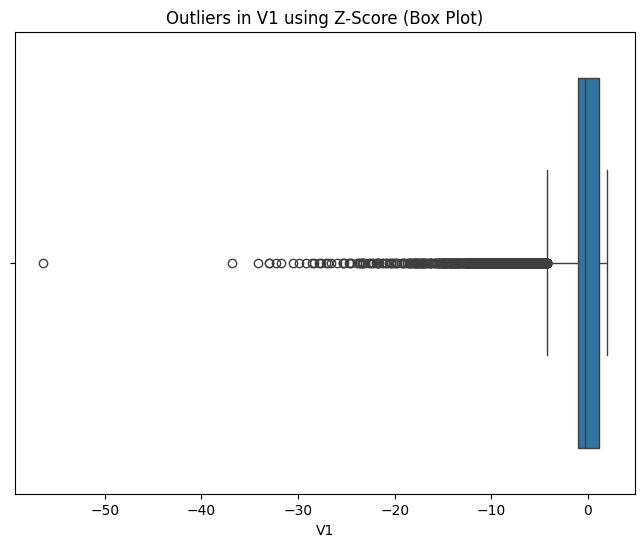

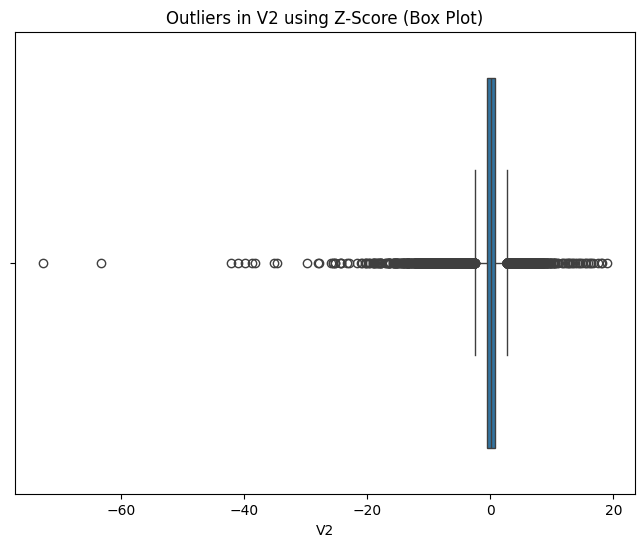

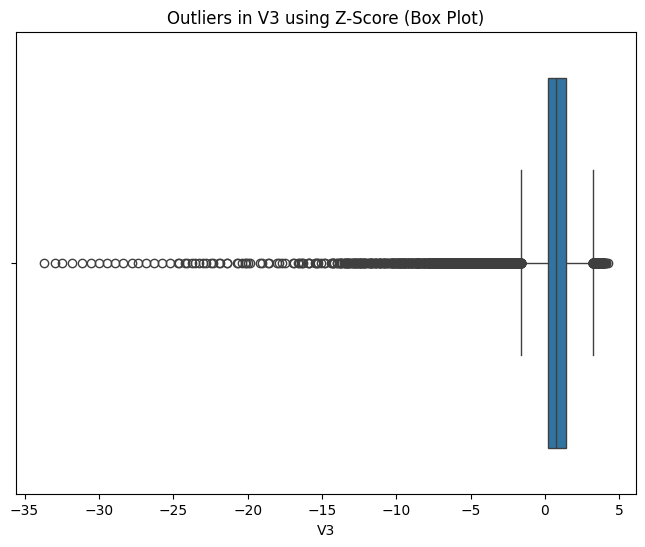

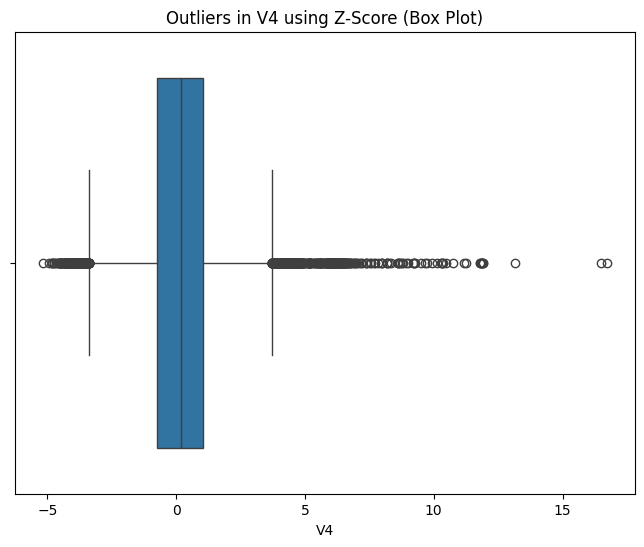

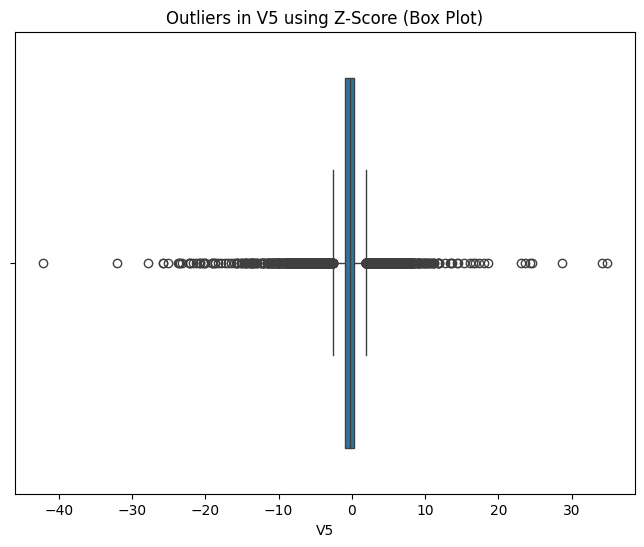

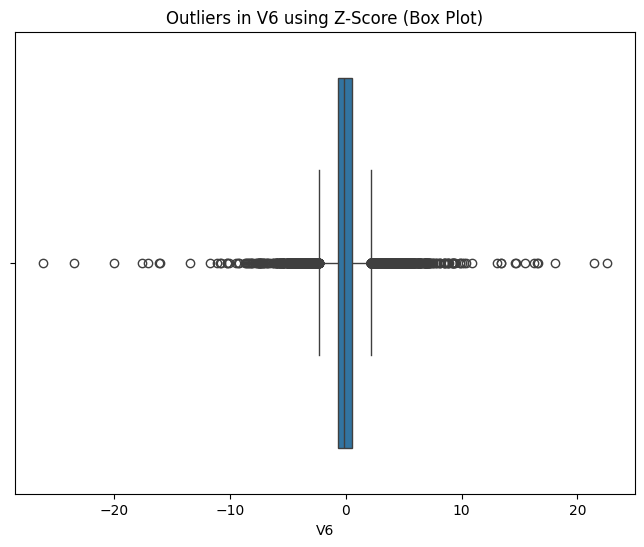

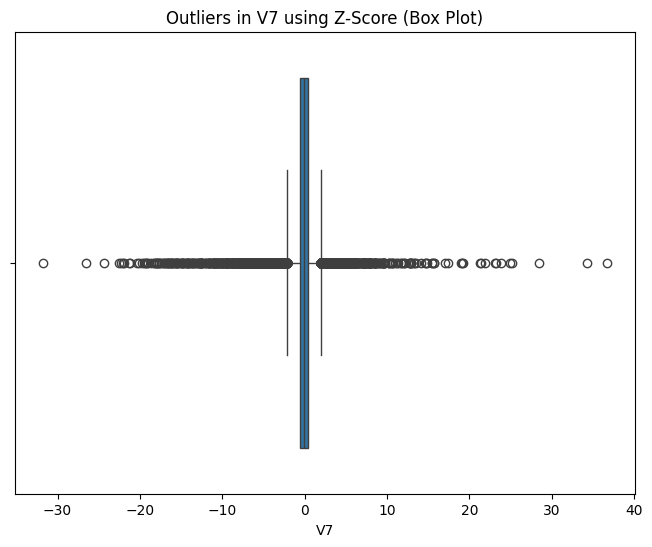

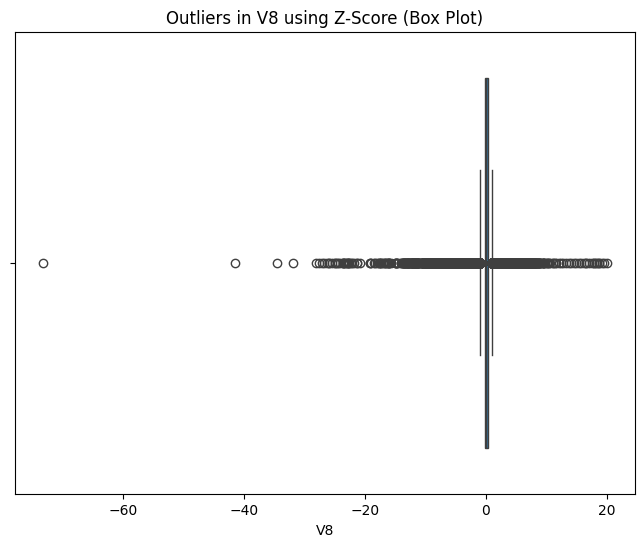

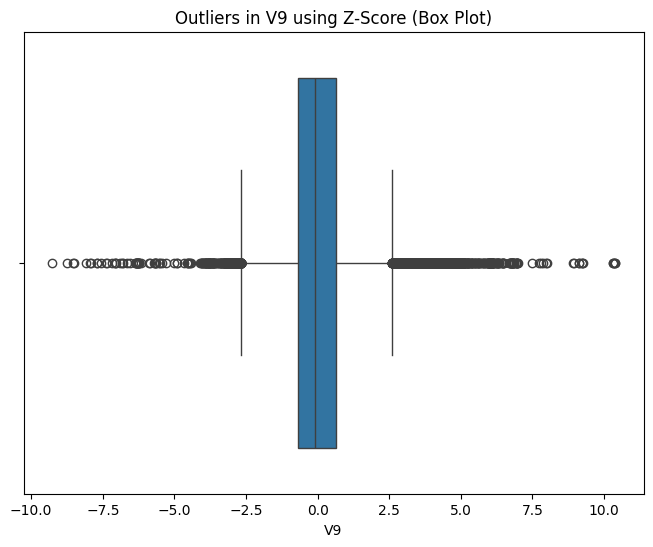

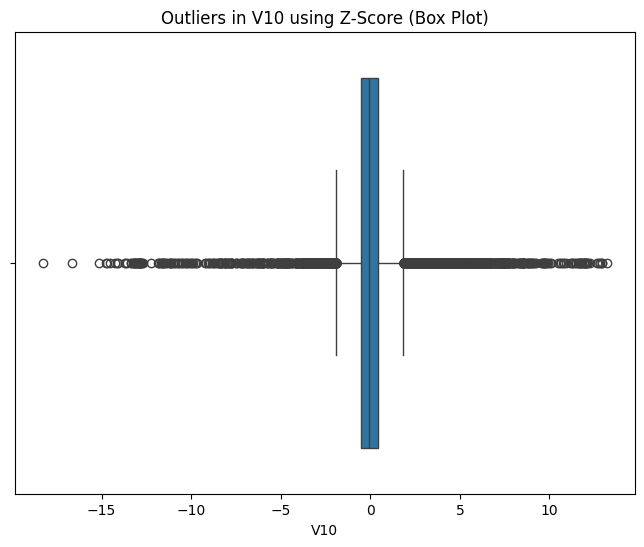

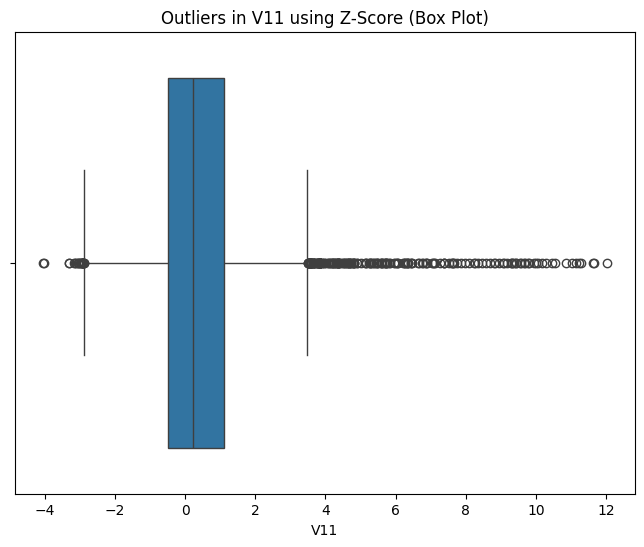

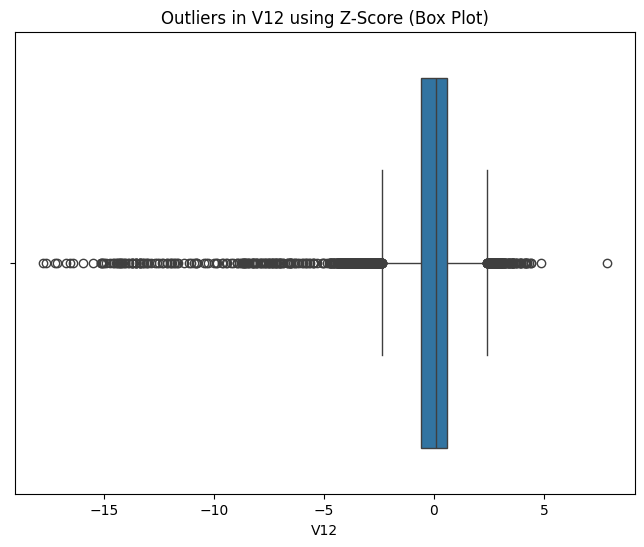

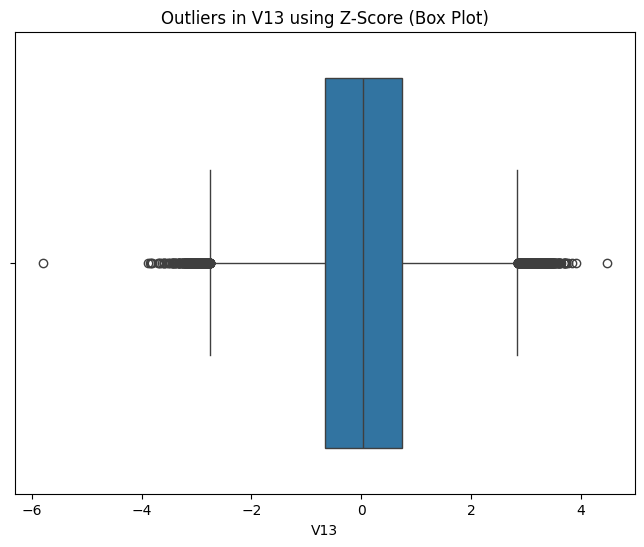

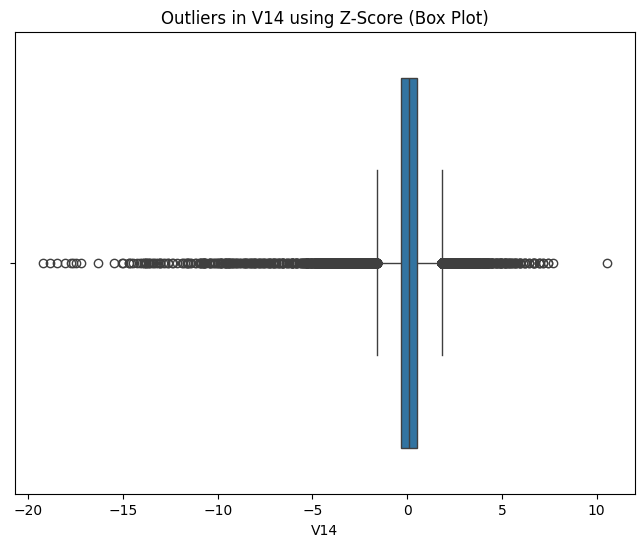

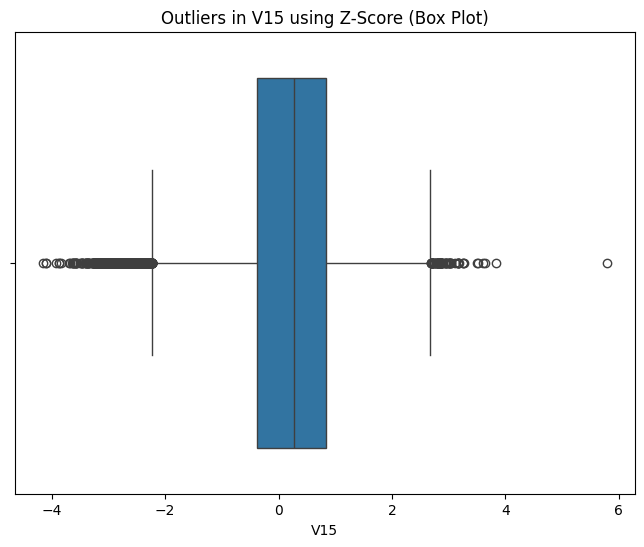

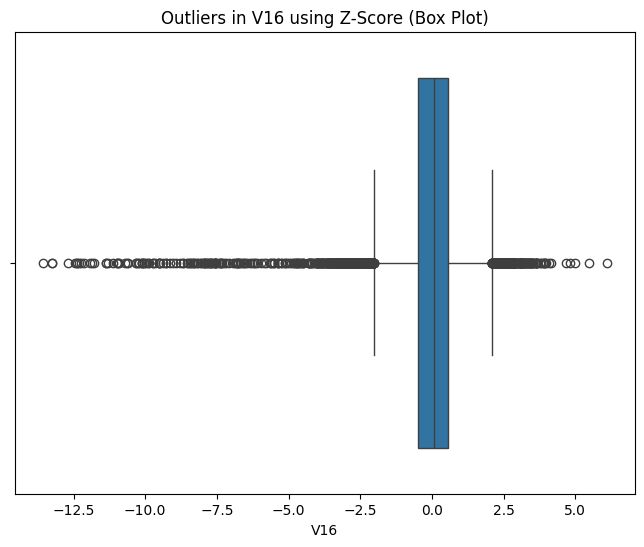

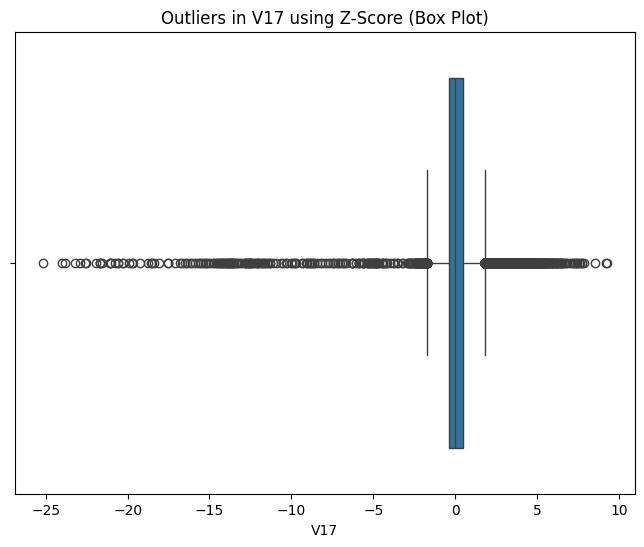

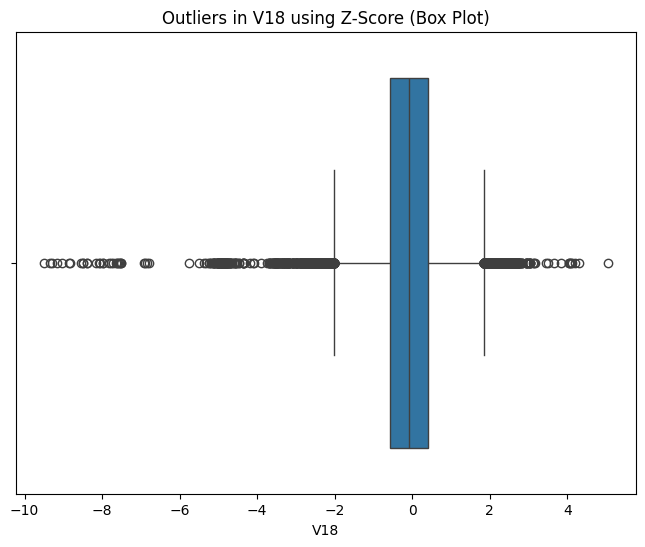

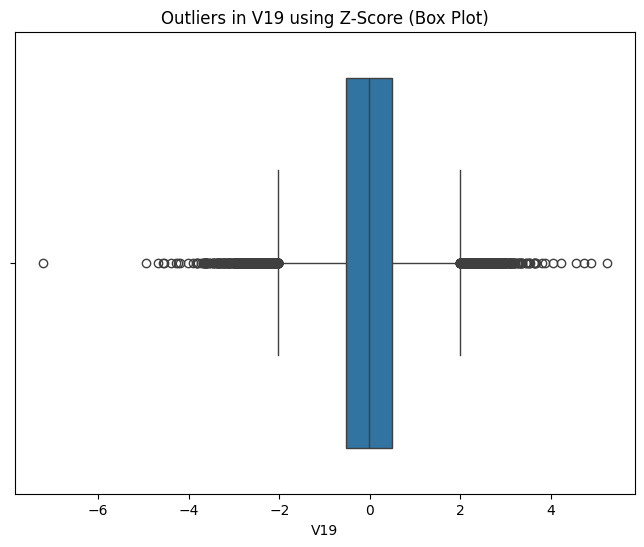

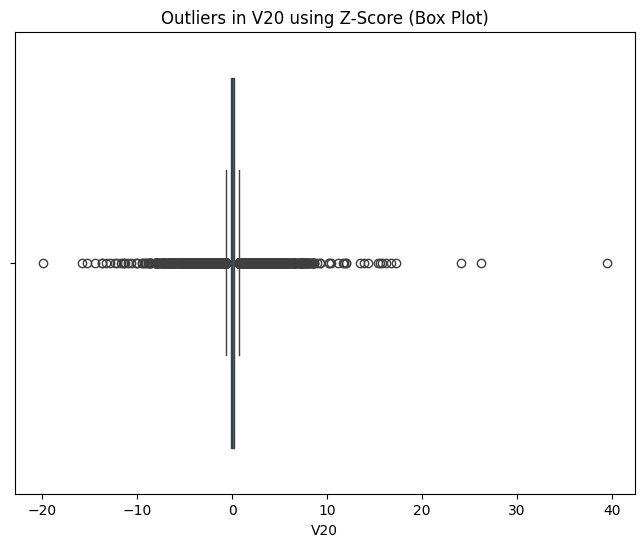

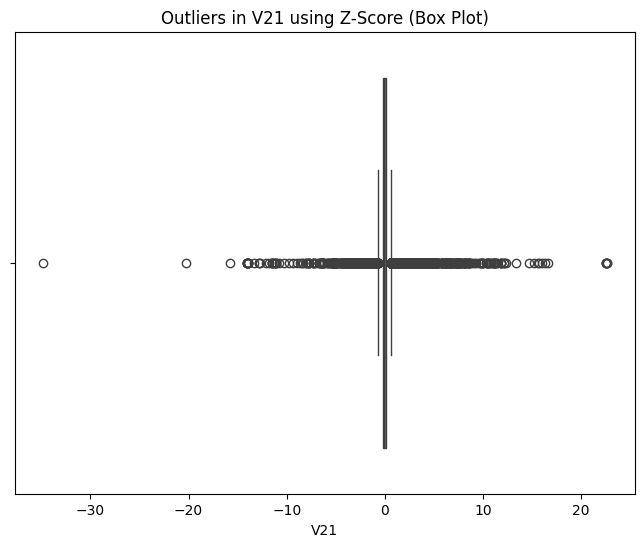

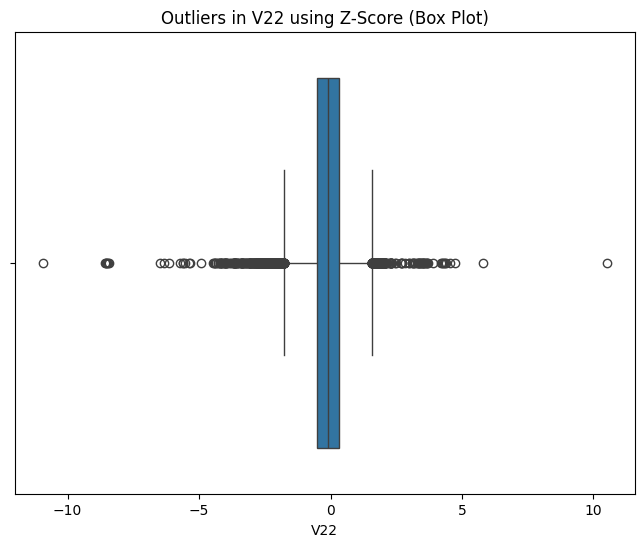

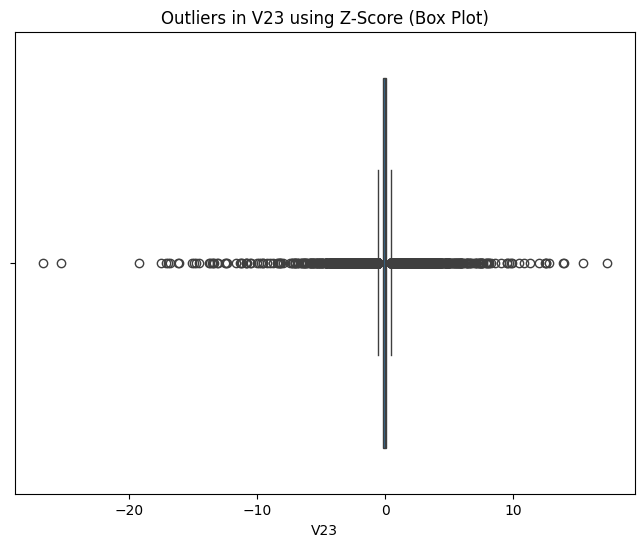

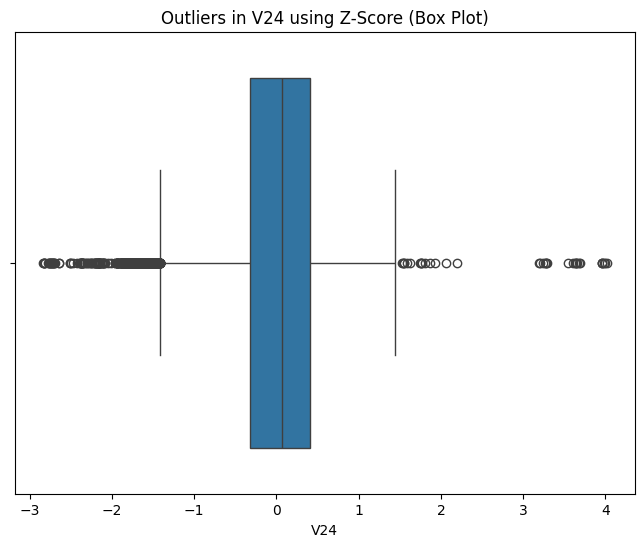

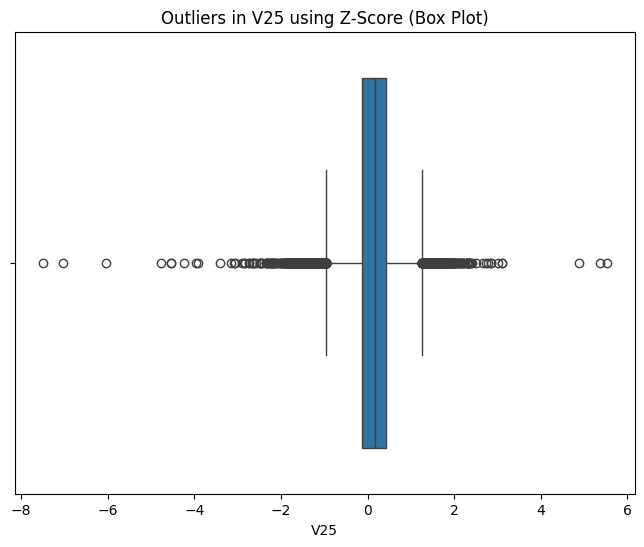

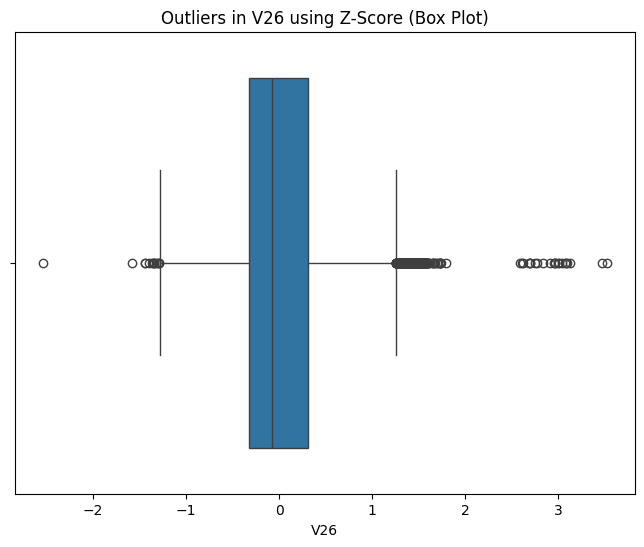

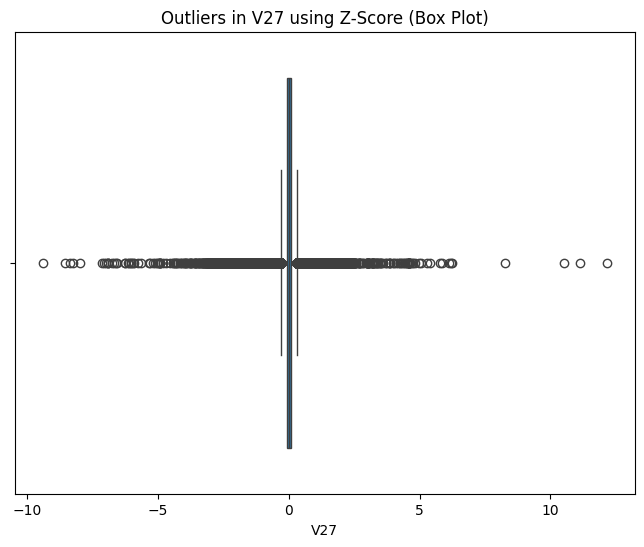

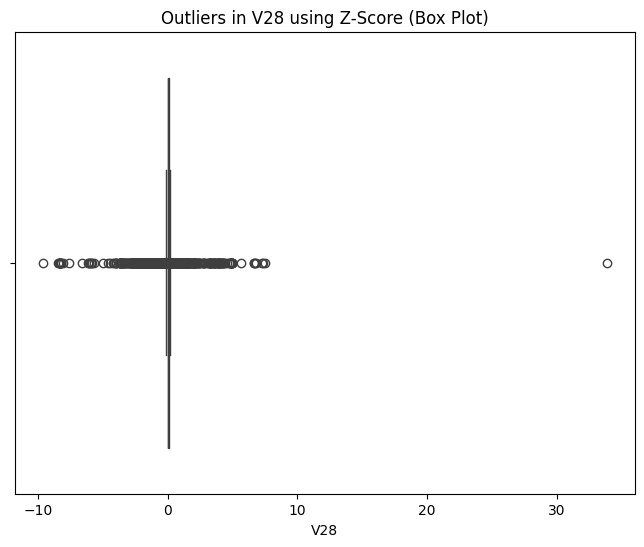

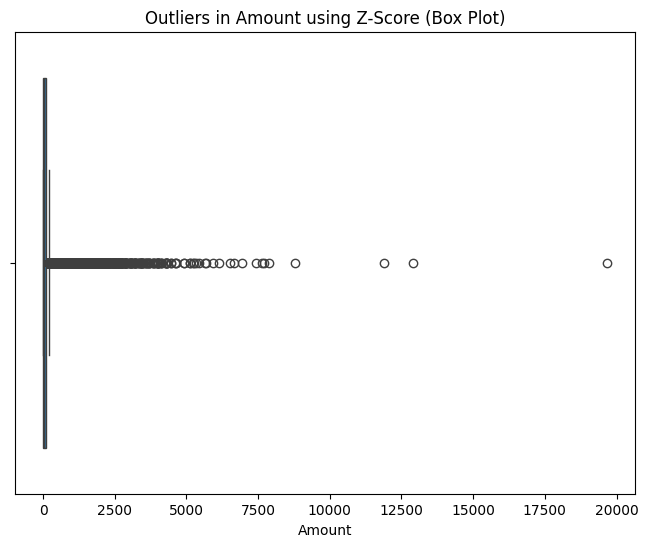

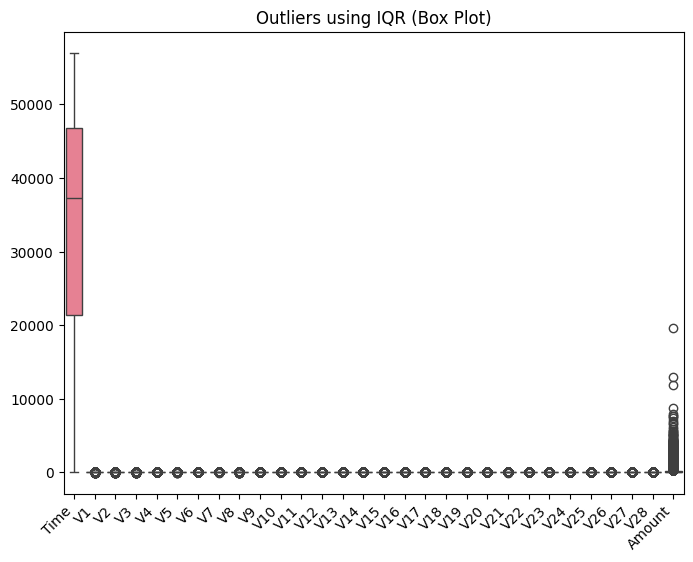

In [22]:
import numpy as np
for feature in Numerical_Features:
    mean = np.mean(df[feature])
    std = np.std(df[feature])
    z_scores = (df[feature] - mean) / std
    outliers_z = df[feature][np.abs(z_scores) > 3]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature} using Z-Score (Box Plot)')
    plt.show()

# IQR method
Q1 = df[Numerical_Features].quantile(0.25)
Q3 = df[Numerical_Features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(((df[Numerical_Features]) < (Q1 - 1.5 * IQR)) | (df[Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(8, 6))
sns.boxplot(data=outliers_iqr[Numerical_Features])
plt.title('Outliers using IQR (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
import numpy as np

# Calculate upper and lower bounds (same as in Cell 1)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Cap the outliers
for feature in Numerical_Features:
    df[feature] = np.clip(df[feature], lower_bound[feature], upper_bound[feature])

In [24]:
df['Class'].value_counts(normalize=True)


,proportion
Class,
0.0,0.99756
1.0,0.00244


In [25]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           ConfusionMatrixDisplay, roc_auc_score,
                           precision_recall_curve, average_precision_score,
                           PrecisionRecallDisplay, RocCurveDisplay)
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [26]:
df.shape

(77034, 31)

In [27]:
X = df.drop('Class', axis=1)
y = df['Class']

# Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Scaling for distance-based models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest with Class Weighting



Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15369
         1.0       0.84      0.82      0.83        38

    accuracy                           1.00     15407
   macro avg       0.92      0.91      0.91     15407
weighted avg       1.00      1.00      1.00     15407

ROC AUC: 0.9993
Average Precision: 0.8999


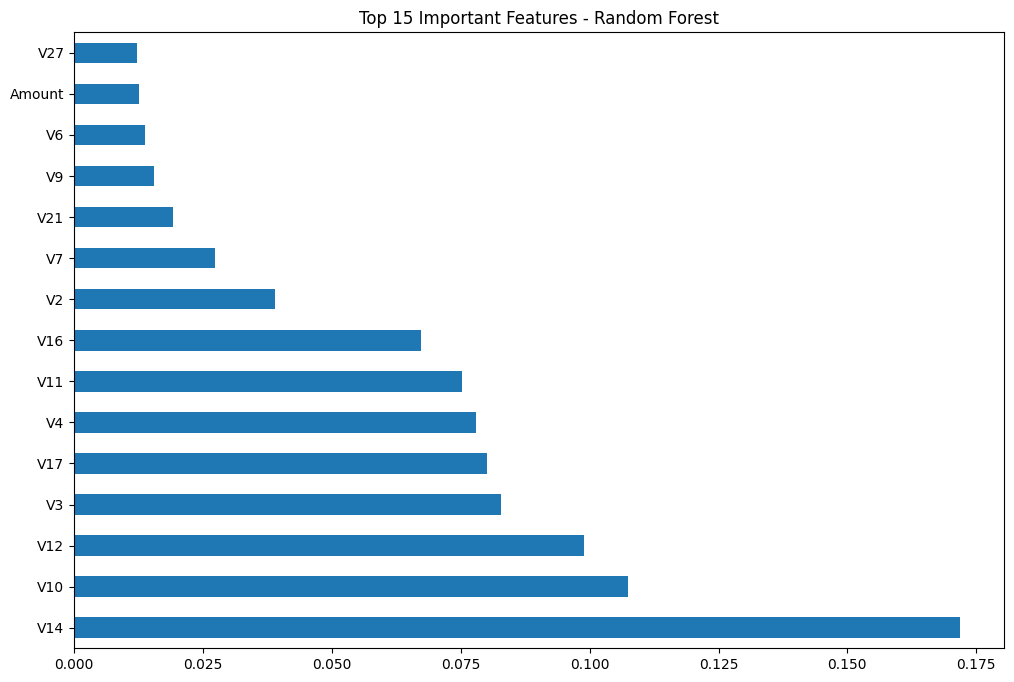

In [28]:
rf_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'class_weight': 'balanced_subsample',
    'random_state': 42,
    'n_jobs': -1
}

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train, y_train)

# Evaluation
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba_rf):.4f}")

# Feature Importance
plt.figure(figsize=(12, 8))
pd.Series(rf.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh')
plt.title('Top 15 Important Features - Random Forest')
plt.show()

 XGBoost


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15369
         1.0       0.71      0.84      0.77        38

    accuracy                           1.00     15407
   macro avg       0.86      0.92      0.89     15407
weighted avg       1.00      1.00      1.00     15407

ROC AUC: 0.9978
Average Precision: 0.8210


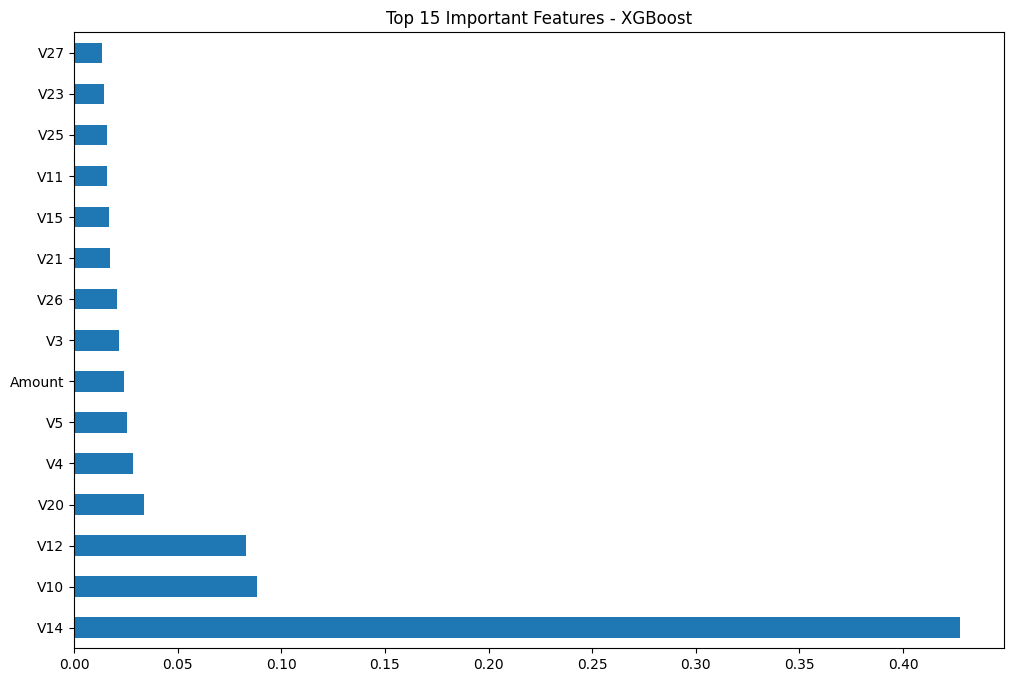

In [29]:

scale_pos_weight = len(y_train[y_train==0])/len(y_train[y_train==1])

xgb_params = {
    'n_estimators': 300,
    'max_depth': 6,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': scale_pos_weight,
    'random_state': 42,
    'eval_metric': 'aucpr',  # Optimize for AUCPR
    'tree_method': 'hist'    # Faster training
}

xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train)

# Evaluation
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_xgb):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba_xgb):.4f}")

# Feature Importance
plt.figure(figsize=(12, 8))
pd.Series(xgb.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh')
plt.title('Top 15 Important Features - XGBoost')
plt.show()

SMOTEENN + LightGBM with Optimal Parameters



In [30]:
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train_scaled, y_train)

lgbm_params = {
    'n_estimators': 500,
    'max_depth': -1,  # Unlimited
    'learning_rate': 0.01,
    'num_leaves': 31,
    'min_child_samples': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 42,
    'class_weight': 'balanced'
}

lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_res, y_res)

# Evaluation
y_pred_lgbm = lgbm.predict(X_test_scaled)
y_proba_lgbm = lgbm.predict_proba(X_test_scaled)[:, 1]

print("\nLightGBM (SMOTEENN) Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_lgbm):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba_lgbm):.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 61477, number of negative: 61332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 122809, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




LightGBM (SMOTEENN) Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15369
         1.0       0.61      0.89      0.72        38

    accuracy                           1.00     15407
   macro avg       0.80      0.95      0.86     15407
weighted avg       1.00      1.00      1.00     15407

ROC AUC: 0.9977
Average Precision: 0.7981


Model Comparison and Visualization


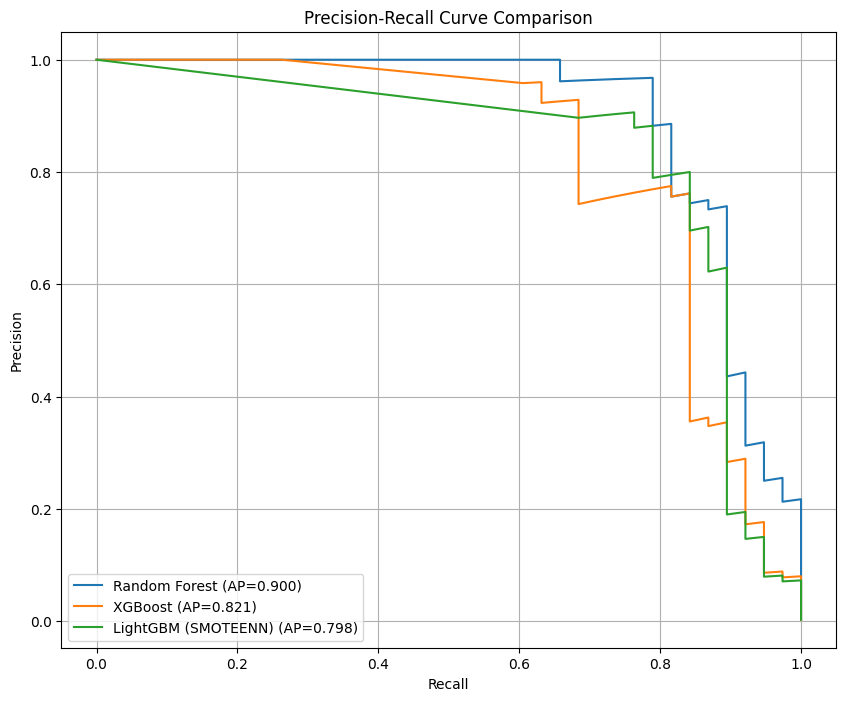

<Figure size 1000x800 with 0 Axes>

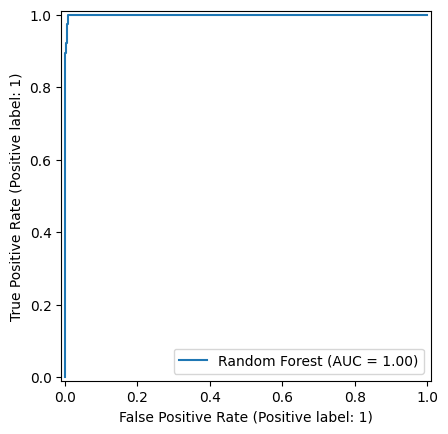

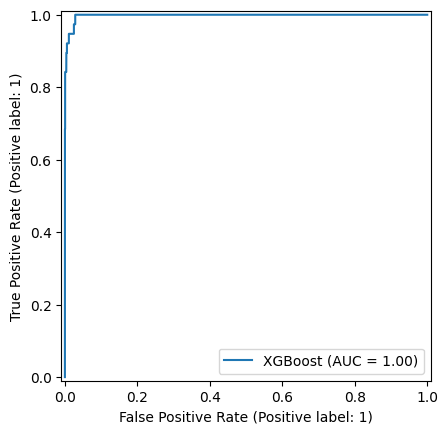

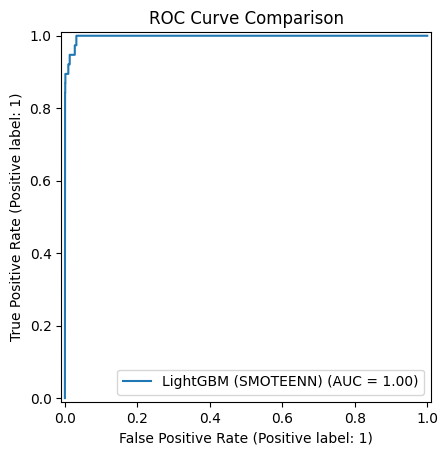

In [31]:
models = {
    'Random Forest': y_proba_rf,
    'XGBoost': y_proba_xgb,
    'LightGBM (SMOTEENN)': y_proba_lgbm
}

# Precision-Recall Curve Comparison
plt.figure(figsize=(10, 8))
for name, y_score in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    ap = average_precision_score(y_test, y_score)
    plt.plot(recall, precision, label=f'{name} (AP={ap:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid()
plt.show()

# ROC Curve Comparison
plt.figure(figsize=(10, 8))
for name, y_score in models.items():
    RocCurveDisplay.from_predictions(y_test, y_score, name=name)
plt.title('ROC Curve Comparison')
plt.show()

In [32]:
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

Learning Curve Function


In [33]:
def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes,
        scoring='average_precision', random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

 Validation Curve Function

In [34]:

def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=5):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring="average_precision", n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

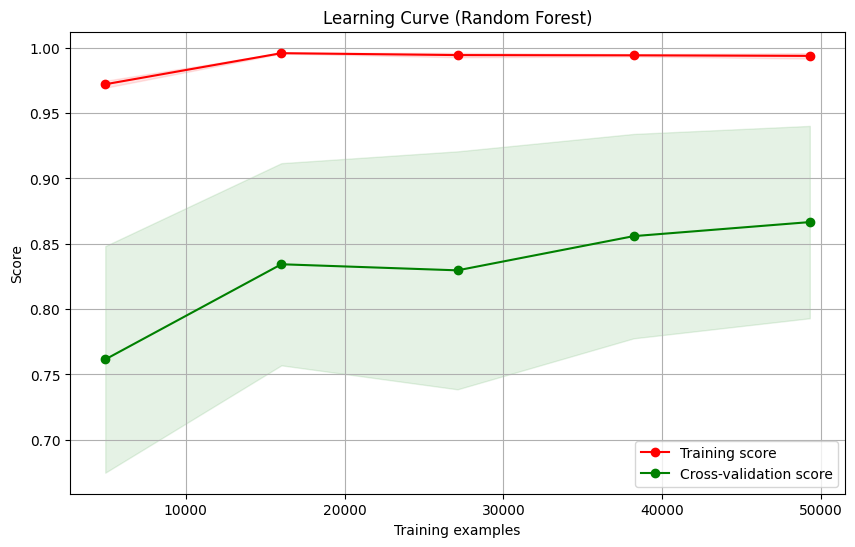

In [35]:
#  Learning Curve - Random Forest
plot_learning_curve(rf, "Learning Curve (Random Forest)", X_train, y_train)
plt.show()

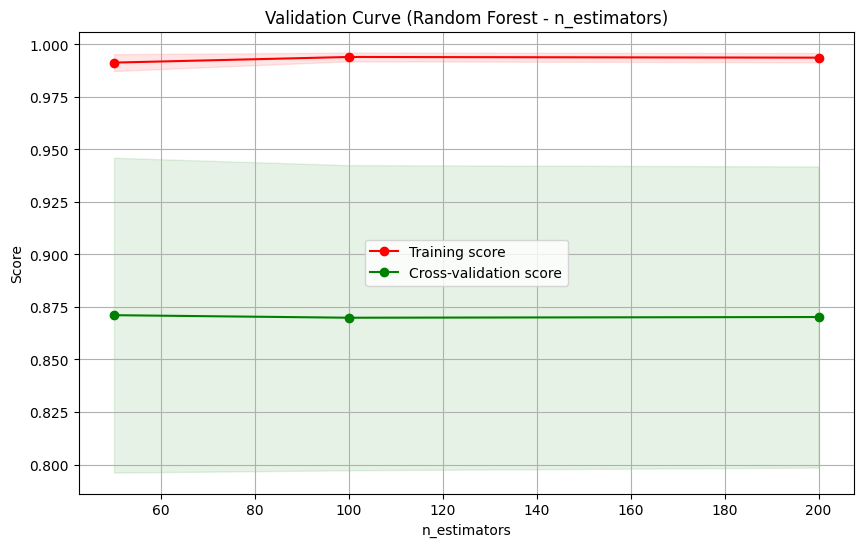

In [36]:
# Validation Curve - Random Forest (n_estimators)
plot_validation_curve(rf, "Validation Curve (Random Forest - n_estimators)",
                     X_train, y_train, "n_estimators", [50, 100, 200])
plt.show()

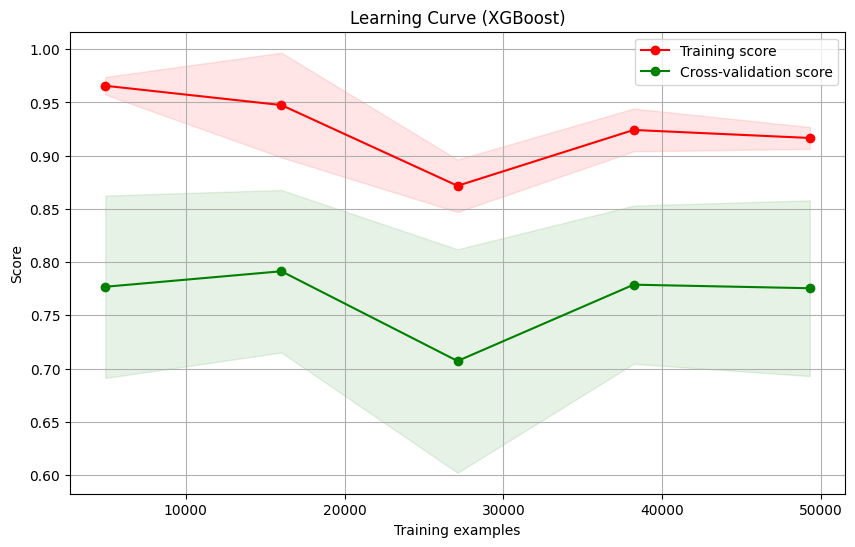

In [37]:
#  Learning Curve - XGBoost
plot_learning_curve(xgb, "Learning Curve (XGBoost)", X_train, y_train)
plt.show()

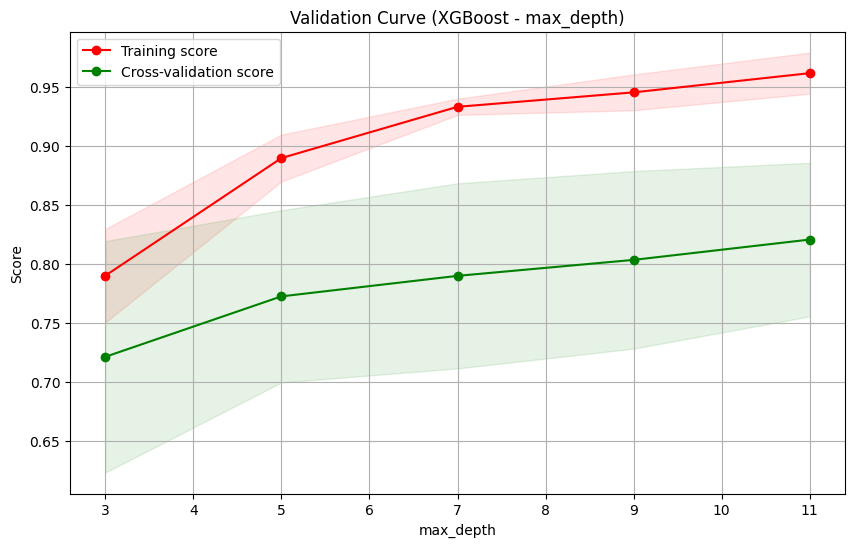

In [38]:
#  Validation Curve - XGBoost (max_depth)
plot_validation_curve(xgb, "Validation Curve (XGBoost - max_depth)",
                     X_train, y_train, "max_depth", [3, 5, 7, 9, 11])
plt.show()

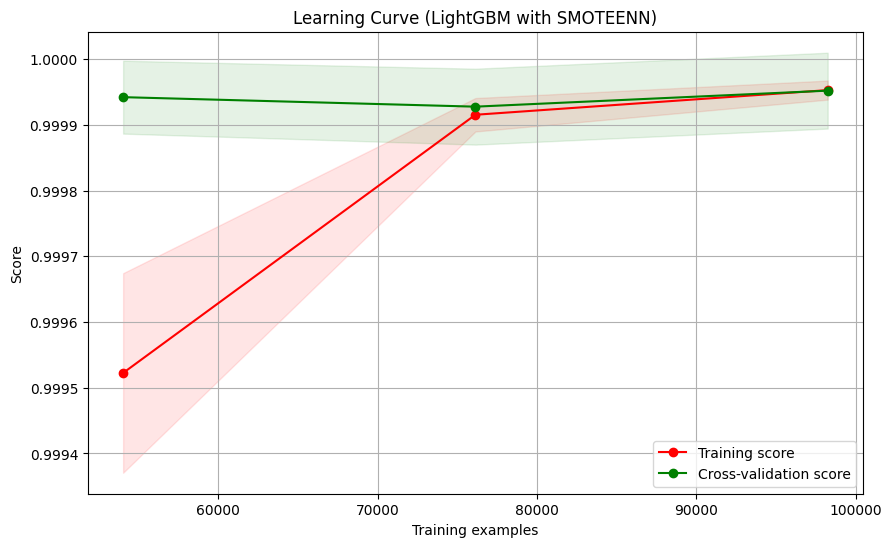

In [39]:
#  Learning Curve - LightGBM (SMOTEENN)
# Note: Using resampled data here
plot_learning_curve(lgbm, "Learning Curve (LightGBM with SMOTEENN)", X_res, y_res)
plt.show()

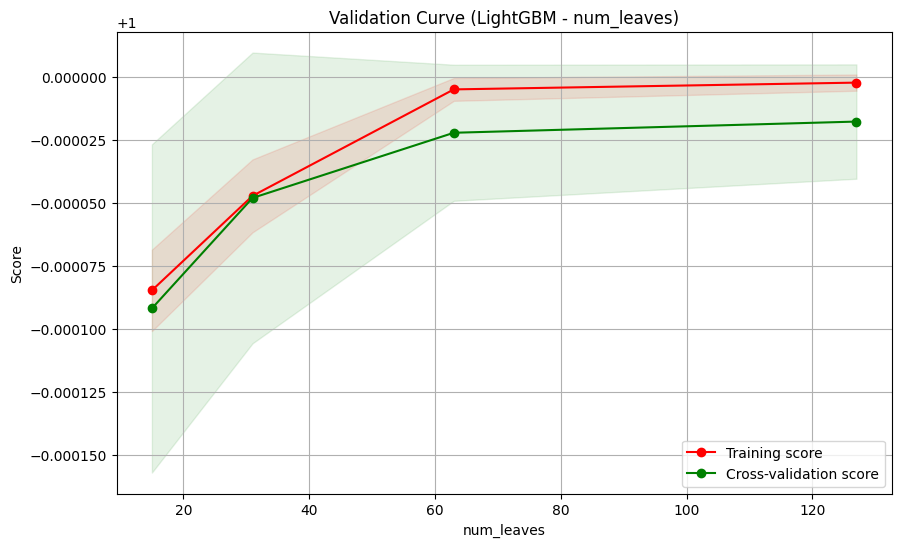

In [40]:
#  Validation Curve - LightGBM (num_leaves)
plot_validation_curve(lgbm, "Validation Curve (LightGBM - num_leaves)",
                     X_res, y_res, "num_leaves", [15, 31, 63, 127])
plt.show()